In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

# Download NLTK resources
nltk.download('stopwords')
nltk.download('punkt_tab')

# Define preprocessing function
def preprocess_text(text):
    # 1. Lowercase the text
    text = text.lower()
    # 2. Remove punctuation and special characters
    text = re.sub(r'[^\w\s]', '', text)
    # 3. Tokenize the text
    tokens = word_tokenize(text)
    # 4. Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # 5. Join the tokens back into a string
    return ' '.join(tokens)

In [ ]:
# Load datasets
true_data = pd.read_csv('True.csv')
fake_data = pd.read_csv('Fake.csv')

In [ ]:
# Label the datasets
fake_data['label'] = 1
true_data['label'] = 0


In [ ]:
# Combine datasets
all_data = pd.concat([fake_data, true_data]).sample(frac=1, random_state=42)

In [ ]:
# Preprocess the text data
all_data['training_feature'] = all_data['title'] + ' ' + all_data['text'] + ' ' + all_data['subject']
all_data['training_feature'] = all_data['training_feature'].apply(preprocess_text)
print(all_data['training_feature'])

# Split features and labels
X = all_data['training_feature'].values
y = all_data['label'].values

In [58]:
# Vectorize text data
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X)

In [59]:
# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [60]:
# Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

In [61]:
# Make predictions
train_y_hat = model.predict(X_train)
test_y_hat = model.predict(X_test)

In [62]:
# Compute and display confusion matrices
print("Confusion Matrix (Training Data):")
print(confusion_matrix(Y_train, train_y_hat))

print("\nConfusion Matrix (Testing Data):")
print(confusion_matrix(Y_test, test_y_hat))  # Re-typed line

Confusion Matrix (Training Data):
[[17065    68]
 [   90 18695]]

Confusion Matrix (Testing Data):
[[4262   22]
 [  36 4660]]


In [63]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Evaluate and display metrics
print("\nPerformance Metrics (Testing Data):")
print(f"Accuracy: {accuracy_score(Y_test, test_y_hat):.2f}")
print(f"Precision: {precision_score(Y_test, test_y_hat):.2f}")
print(f"Recall: {recall_score(Y_test, test_y_hat):.2f}")
print(f"F1 Score: {f1_score(Y_test, test_y_hat):.2f}")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(Y_test, test_y_hat))  # Re-typed this line


Performance Metrics (Testing Data):
Accuracy: 0.99
Precision: 1.00
Recall: 0.99
F1 Score: 0.99

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4284
           1       1.00      0.99      0.99      4696

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



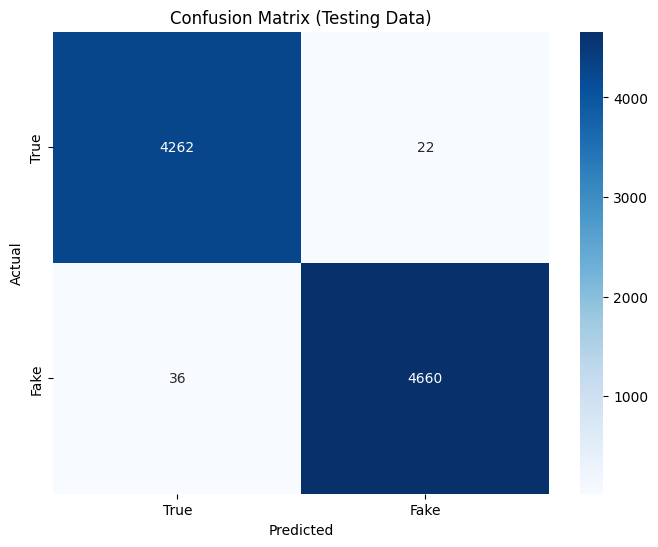

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(Y_test, test_y_hat), annot=True, fmt='d', cmap='Blues', xticklabels=['True', 'Fake'], yticklabels=['True', 'Fake'])
plt.title("Confusion Matrix (Testing Data)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()